# Introduction

Data scientists spend 80% of their time collecting, cleaning, transforming and reorganizing data, and only 20% analyzing it and producing insights.

### What is data cleaning?
This is the process of detecting and removing corrupt or inaccurate records from a table, database or record set. Incomplete, incorrect, inaccurate or irrelevant parts of the are identified then replaced, modified or deleted.

Key aspects of clean data include:


*   Complete
*   Correct
*   Accurate
*   Relevant

In this guide, I will be sharing a few common tasks you will perform during the data cleaning process using the [New York City Airbnb data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) from Kaggle. Some of the commom tasks will entail:
*   Handling missing values
*   Outliers
*   Inconsistent/Irrelevant features
*   Duplicate data









# Data cleaning

Importing required libraries

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

Mounting drive

In [ ]:
#root path
root = '/content/drive'

#file storage path
storage_path = "/My Drive/Data Analysis"
drive.mount(root)

Mounted at /content/drive


Loading dataset

In [ ]:
file_path = f'{root}{storage_path}/AB_NYC_2019.csv'
airbnb_df = pd.read_csv(file_path)



Exploratory Data Analysis

In [ ]:
#inspecting dataset - head
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#inspecting dataset - tail
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


Data info() - shows data types, shape, memory usage

In [ ]:
#data info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Checking for trailling whitespaces

After we know which data types we are dealing with, let's make sure we check and remove any trailing characters and whitespace using strip for columns of strings.

In [ ]:
def remove_spaces(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col]= df[col].str.strip()

remove_spaces(airbnb_df)


Dealing with outliers

We can view the summary statistics of numerical columns with df.describe() method. It enable us to detect outliers in the data which require further investigation.Dealing with outliers is similar to removing missing values, the only difference is the way you find outliers.

In [ ]:
#data describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We can see that there are discrepancies in the price column.
The minimum price is 0 implying it is an invalid entry. We can drop rows with zero prices or replace them with the mean price depending on the cleaning objective.

You can also plot a histogram and look at the distribution of your data.

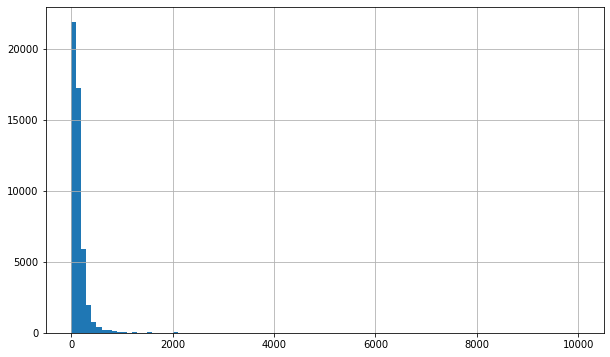

In [ ]:
plt.figure(figsize=(10, 6))
airbnb_df['price'].hist(bins=100)

A boxplot is also useful in detecting outliers.

As you can see, the price column has multiple data points that are outliers

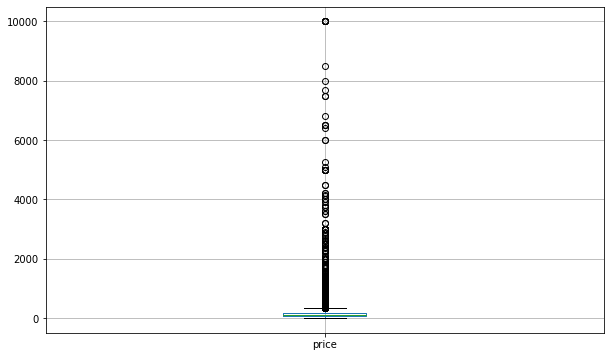

In [ ]:
plt.figure(figsize=(10, 6))
airbnb_df.boxplot(column=['price'])

In [ ]:
#dropping rows with zero prices
airbnb_df_clean_drop=airbnb_df[airbnb_df['price']!=0]

#calculating mean of price column
mean = airbnb_df['price'].mean()
#replacing zero price with the means
airbnb_df['price'].replace(0, mean, inplace=True)

#checking final output
airbnb_df_clean_drop.shape

(48884, 16)

Missing Data

Two common methods to deal with missing values:


*   dropping rows/columns
*   imputing them based on other observations such as mean or median

There are a few challenges to these approaches;

By dropping rows/columns, you're essentially losing information that might be useful for prediction.

On the other hand, imputing values will introduce a bias to your data but it still might be better than dropping your features.

Dealing with missing data depends on the context of the problem you're trying to solve. It's recommended to experiemnt with different methods to effectively utilize the data you have in hand.



Columns with missing values

In [ ]:
#function to check missing values
def missing_values(df):
  for col in df.columns:
    missing_vals = df[col].isnull().sum()
    print(f'{col} => {missing_vals}')

missing_values(airbnb_df)

id => 0
name => 16
host_id => 0
host_name => 21
neighbourhood_group => 0
neighbourhood => 0
latitude => 0
longitude => 0
room_type => 0
price => 0
minimum_nights => 0
number_of_reviews => 0
last_review => 10052
reviews_per_month => 10052
calculated_host_listings_count => 0
availability_365 => 0


Knowing the percentage of missing values in each column can be useful in determining whether you should drop the column.Percentage is calculated using the mean.

In [ ]:
#function to check missing values
def perc_missing_values(df):
  for col in df.columns:
    pct_missing_vals = df[col].isnull().mean()*100
    print(f'{col} => {round(pct_missing_vals,2)}')

perc_missing_values(airbnb_df)

id => 0.0
name => 0.03
host_id => 0.0
host_name => 0.04
neighbourhood_group => 0.0
neighbourhood => 0.0
latitude => 0.0
longitude => 0.0
room_type => 0.0
price => 0.0
minimum_nights => 0.0
number_of_reviews => 0.0
last_review => 20.56
reviews_per_month => 20.56
calculated_host_listings_count => 0.0
availability_365 => 0.0


Heatmap of missing values

Heatmaps are also useful to visualize your missing values.

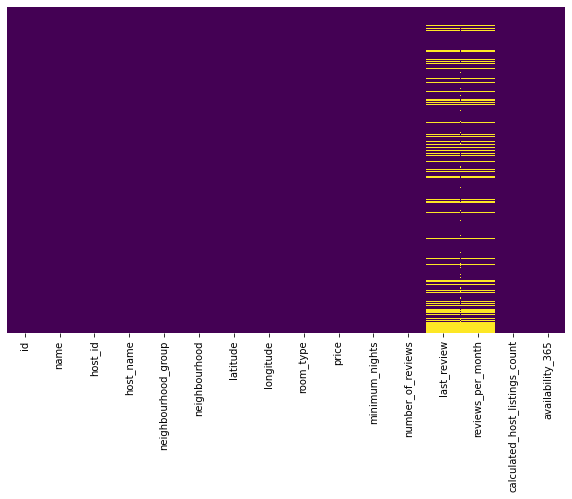

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(airbnb_df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

Dealing with missing values



*   Drop the feature
*   Impute missing value




**Drop the feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. We can decide a threshold, say 60% to use for dropping the variables which have a missing value ration more than the 60%. There is no hard and fast rule to decide this threshold and it can vary from problem to problem.

In [ ]:
#columns to drop
to_drop = ['id','host_name','last_review']

#dropping unnecessary columns
airbnb_df.drop(to_drop, axis=1, inplace=True)

**Imputing**

For imputing, there are 3 main techniques:

fillna — filling in null values based on given value (mean, median, mode, or specified value)

bfill / ffill — stands for backward fill and forward fill (filling in missing values based on the value after or before the column.)

Simple Imputer — Sk-learn’s built-in function that imputes missing values (commonly used alongside a pipeline when building ML models)

Applying these methods to price column as an example

In [ ]:
# imputing price with mean
price_mean_value = round(airbnb_df['price'].mean(), 2)
airbnb_df['price'].fillna(price_mean_value, inplace=True)

# imputing price with median
price_median_value = round(airbnb_df['price'].median(), 2)
airbnb_df['price'].fillna(price_median_value, inplace=True)

# imputing with bfill or ffill
airbnb_df['price'].bfill(inplace=True)
airbnb_df['price'].ffill(inplace=True)

# imputing with SimpleImputor from the sklearn library
from sklearn.impute import SimpleImputer
# define the imputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean') # or median

airbnb_df[['price']] = imr.fit_transform(airbnb_df[['price']])

**Renaming columns**

There are cases where you want to rename your columns as well.
You can do this by using a dictionary, setting the key as the original column name, and the value as the new column name.

In [ ]:
#defining columns to be renamed
new_names = {'name':'listing_name', 'latitude':'lat', 'longitude':'long'}

airbnb_df.rename(columns=new_names, inplace=True)
airbnb_df.head()

,listing_name,host_id,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**DateTime datatypes**

If you have data that should be a datetime object, but are strings, you can use the pd.to_datetime, and pass it the format that represents your data.

In [ ]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], format='%Y-%m-%d')
airbnb_df['last_review'].dtype.type

numpy.datetime64

**Duplicates**

There are cases where your rows have duplicate values, this could’ve happened due to some mishaps in your data collection.

In [ ]:
airbnb_df.duplicated().any()

## if true
# airbnb_df.drop_duplicates()

## if you want to drop duplicates at specific column
# airbnb_df.drop('col_name', axis=1, inplace=True).drop_duplicates()

False

## Conclusion

It’s important to document your process in data cleaning, i.e. what tools you used, what functions you created, and your approach.

This is so that others to understand what you did, and it can eventually become the culture or process for how your organization deal with dirty data.

The best way to learn is to practice it hands-on, this definitely applies to data cleaning because different datasets require different methods to clean.

**Resources**

*   The Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
*   The NumPy [documentation](https://numpy.org/doc/stable/reference/)
*   [Python for Data Analysis](https://wesmckinney.com/book/) by Wes McKinney, the creator of Pandas
*  [ Pandas Cookbook ](https://www.amazon.com/Pandas-Cookbook-Scientific-Computing-Visualization/dp/1784393878)by Ted Petrou
*  [ Effective pandas ](https://www.amazon.com/Pandas-Cookbook-Scientific-Computing-Visualization/dp/1784393878)by Matt Harrison


